In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data.csv")
#df["date"] = pd.to_datetime(df["created_at"]).dt.date
#df["time"] = pd.to_datetime(df["created_at"]).dt.time
#df.drop(columns=["created_at"], inplace=True)

In [3]:
df.shape

(5000, 7)

In [4]:
df["order_amount"].mean()

3145.128

* A very naive approach of taking the mean of the order_amount was adopted to calculate the average order value(AOV) which is erroneous because each order has more than one item in it. Thereby while calculating the mean which is $ (total\_sum) / (total\_quantity) $, the result was unreasonably huge number. 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


## Calculating the mean value of the sneakers

In [6]:
df["price_per_unit"] = df["order_amount"]/df["total_items"]

In [7]:
df.head().to_csv("results/method_1.csv")

# Method -1

In [8]:
df["price_per_unit"].mean()

387.7428

**Therefore the mean or the AOV of the sneakers is 387.742**

In [9]:
pd.DataFrame(df["price_per_unit"].describe()).to_csv("results/price_per_unit.csv")

In [10]:
pd.DataFrame(df["price_per_unit"].describe())

,price_per_unit
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


In [11]:
pd.DataFrame(df["order_amount"].describe())

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


In [12]:
pd.DataFrame(df["order_amount"].describe()).to_csv("results/order_amt.csv")

In [13]:
pd.DataFrame(df["total_items"].describe()).to_csv("results/total_times.csv")

In [14]:
pd.DataFrame(df["total_items"].describe())

,total_items
count,5000.00000
mean,8.78720
std,116.32032
min,1.00000
25%,1.00000
50%,2.00000
75%,3.00000
max,2000.00000


In [15]:
# finding number of values above mean and its value
df[df["price_per_unit"]>df["price_per_unit"].mean()]["price_per_unit"].value_counts()

25725.0    46
Name: price_per_unit, dtype: int64

In [16]:
# finding number of values above mean and its value
df[df["total_items"]>df["total_items"].mean()]["total_items"].value_counts()

2000    17
Name: total_items, dtype: int64

In [17]:
# finding number of values above mean and its value
df_counts_max = df[df["order_amount"]>df["order_amount"].mean()][
    ["order_amount","total_items", "price_per_unit", "shop_id", "user_id"]
].value_counts()
pd.DataFrame(df_counts_max)

0
order_amount total_items price_per_unit shop_id user_id    
704000       2000        352.0          42      607      17
77175        3           25725.0        78      766       1
51450        2           25725.0        78      855       1
                                                869       1
                                                927       1
                                                935       1
                                                936       1
                                                946       1
                                                960       1
                                                967       1
                                                983       1
77175        3           25725.0        78      775       1
51450        2           25725.0        78      814       1
77175        3           25725.0        78      787       1
                                                817       1
                                                818       1
                                                915       1
                                                928       1
                                                962       1
                                                969       1
102900       4           25725.0        78      834       1
154350       6           25725.0        78      878       1
51450        2           25725.0        78      828       1
25725        1           25725.0        78      740       1
                                                745       1
                                                890       1
                                                800       1
                                                812       1
                                                823       1
                                                852       1
                                                855       1
                                                861       1
                                                866       1
                                                867       1
                                                889       1
                                                910       1
51450        2           25725.0        78      760       1
25725        1           25725.0        78      912       1
                                                944       1
                                                970       1
                                                982       1
                                                990       1
                                                997       1
51450        2           25725.0        78      707       1
                                                709       1
                                                756       1
                                                810       1

In [18]:
pd.DataFrame(df_counts_max).to_csv("results/grouped.csv")

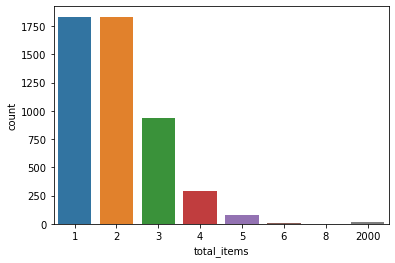

In [19]:
chart = sns.countplot(x='total_items', data=df).get_figure()

chart.savefig("results/output.png")

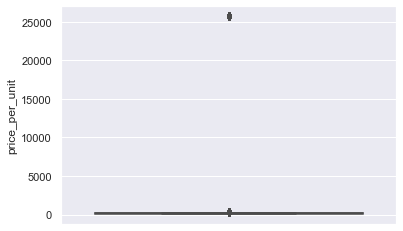

In [20]:
sns.set_theme(style="darkgrid")
box_plot = sns.boxplot(data=df, y="price_per_unit").get_figure()
box_plot.savefig("results/boxplot.png")

**Comments**

- There are definitely outliers present in the data
- We can treat them in one of the following methods
    * Remove the outliers and find the mean of the rest of the data
    * Use median which is less affected by the outliers

# Method - 2

## Remove the outliers

In [21]:
no_outlier_df = df[df["price_per_unit"]<df["price_per_unit"].max()]

In [22]:
no_outlier_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_unit
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


In [23]:
no_outlier_df["order_amount"].mean()

2717.3677836092047

In [24]:
# This value is quite less than the median
full_removed_df = no_outlier_df[no_outlier_df["order_amount"]<no_outlier_df["order_amount"].max()]

In [25]:
pd.DataFrame(full_removed_df.describe()).to_csv("results/final.csv")

In [26]:
pd.DataFrame(full_removed_df.describe())

,order_id,shop_id,user_id,order_amount,total_items,price_per_unit
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


# Method - 3

## Consider median of the whole dataset

In [27]:
pd.DataFrame(df.median()).to_csv("results/median.csv")

/var/folders/9y/pzvnqtl16zx6ry42n8nkvdq40000gn/T/ipykernel_47085/4118605260.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df.median()).to_csv("results/median.csv")


In [28]:
print(f'The A.O.V is {df["order_amount"].median()}')

The A.O.V is 284.0
